In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

            Time_s  Sensor0_Raw  Sensor1_Raw  DutyCycle
6502  1.736096e+09       1.0839       1.3097      113.0
8750  1.736096e+09       1.0581       1.2097      158.0
6672  1.736096e+09       1.0871       1.3129      116.0
8393  1.736096e+09       1.0645       1.2226      150.0
8747  1.736096e+09       1.0581       1.2129      158.0


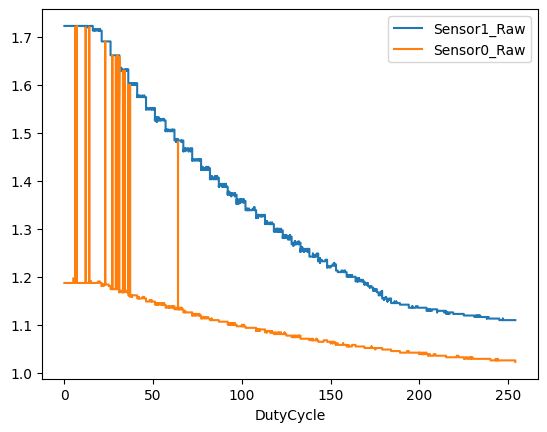

In [20]:
df = pd.read_csv('calibration_data.csv')
print(df.sample(5))

df[['DutyCycle', 'Sensor1_Raw', 'Sensor0_Raw']].plot(x="DutyCycle")
plt.show()

In [21]:
X = np.array(df[['DutyCycle', 'Sensor1_Raw']])
y = np.array(df['Sensor0_Raw']) # magnet and permanent magnet

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8220391839975695

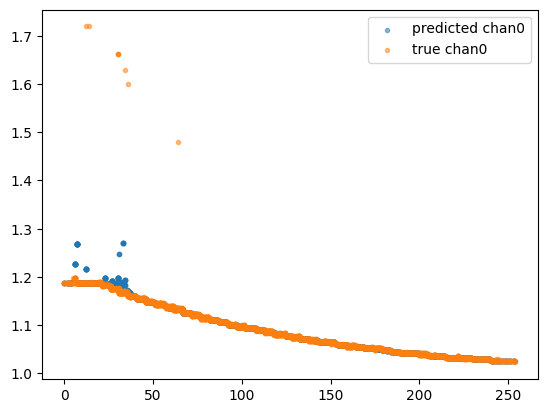

In [22]:
plt.scatter(X_test[:,0], model.predict(X_test), label='predicted chan0', marker='.', alpha=0.5)
plt.scatter(X_test[:,0], y_test, label='true chan0', marker='.',alpha=0.5)
plt.legend()

In [23]:
pred = model.predict(np.array([0,1.6]).reshape(1,-1))[0]

pred

1.1695222195271817

In [24]:
2.4 - pred

1.2304777804728182